<img src="static/images/datachain-logo.png" alt="Dataset" style="width: 200px;"/>

# 🖼 Working with Image DataChains

Welcome to our second tutorial, in which we dive into managing and optimizing image datasets with **[Datachain](https://github.com/iterative/datachain)**! Enhance your skills in handling complex image data, from filtering to minimizing redundancy.

## 📋 Agenda
1. **Filtering & Sorting** - Refine your datasets to get exactly what you need.
2. **Adding Annotations (Signals)** - Enrich your data with meaningful attributes.
3. **Creating and Versioning Datasets** - Manage changes and maintain historical versions of your datasets.
4. **Similarity Search** - Discover and analyze similar images within your dataset.
5. **Minimizing Redundant Images** - Optimize your storage and processing by reducing duplicates.

## 🛠 Prerequisites
Before diving in, make sure you’re set up:
- **[Datachain](https://github.com/iterative/datachain)** is installed in your environment (follow the instructions in `examples/fashion-product-images/README.md`)
- The necessary dependencies installed, including PyTorch and the required libraries (see `requirements.txt`).
- **Dataset Preparation:** The `fashion-product-images` should already be created. If this is your first time, please start with `1-quick-start.ipynb` to get up to speed.

This tutorial is designed to be straightforward and practical, allowing you to apply these concepts directly to your projects. Let’s optimize how you manage image datasets and push the boundaries of what you can achieve with DataChain!

# 📚 Core Concepts & Execution Workflow

**AI 🔗 DataChain - a data structure for batch data processing and evaluation**
- It represents a sequence of data manipulation steps such as reading data from
storages, running AI or LLM models or calling external services API to validate or
enrich data.

<img src="static/images/core-concepts.png" alt="Dataset" style="width: 800px;"/>

| Concept                  | Description |
|--------------------------|-------------|
| **DataChain SaaS / Studio** | Highly performant Unstructured Intelligence Platform for enterprises to automate ETL pipelines and boost collaboration and scalability. Provides UI to manage datasets, edit scripts, and execute compute jobs. |
| **DataChain Library**    | DataChain Library  provides a data frame-like interface that can automatically reference data stored as files (text, images, video) locally or in the cloud. |
| **DataChain**             | DataChain object is a data structure for batch data processing and evaluation. <ul><li>**Object** represents a file in a simple case but can be a virtual “file” or a part of a file.</li><li>**Signal** or **Column** is an object’s attribute.</li><li>**Row** is a set of signals for a given object.</li><li>**Dataset version** is an immutable set of objects with signals / columns</li><li>**Dataset operations**: updating dataset and querying dataset.</li></ul> |
| **Query**                | Query is a way to get a dataset from another dataset as a subset of its objects and signals. Query can create new signals but only trivial one that can be computed in DB. |
| **Processor**            | The processor creates a dataset from another dataset by extending the set of signals or generating new objects. |


In [4]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np

from datachain import DataChain, C

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 🔍 Basic Operations: Selecting, Filtering, Ordering, Grouping

<img src="static/images/basic-operations.png" alt="Dataset" style="width: 600px;"/>

Explore essential operations to manipulate and manage your datasets effectively. This section will guide you through the fundamental techniques of selecting, filtering, ordering, grouping, annotating, and version management.

📋 Key Operations
1. Connecting to a Dataset
2. Filtering & Sorting
3. Adding Annotations (Signals)
4. Saving and Versioning
5. Deleting Dataset Versions

## Create a DataChain

In [6]:
dc = (
    DataChain.from_dataset("fashion-product-images")
)

dc.show(3)

,file,file,file,file,file,file,file,file,file,file,gender,mastercategory,subcategory,articletype,basecolour,season,year,usage,productdisplayname,filename
,source,parent,name,size,version,etag,is_latest,last_modified,location,vtype,,,,,,,,,,
0,gs://datachain-demo,fashion-product-images/images,10000.jpg,1030,1719489653370876,CPzf74/e+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Women,Apparel,Bottomwear,Skirts,White,Summer,2011.0,Casual,Palm Tree Girls Sp Jace Sko White Skirts,10000.jpg
1,gs://datachain-demo,fashion-product-images/images,10001.jpg,1210,1719489640006438,CKaGwIne+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Women,Apparel,Bottomwear,Skirts,Blue,Summer,2011.0,Casual,Palm Tree Kids Girls Sp Jema Skt Blue Skirts,10001.jpg
2,gs://datachain-demo,fashion-product-images/images,10002.jpg,807,1719489670015780,CKTW55fe+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Women,Apparel,Bottomwear,Skirts,Blue,Summer,2011.0,Casual,Palm Tree Kids Sp Jema Skt Blue Skirts,10002.jpg



[Limited by 3 rows]


## Filtering & Sorting

Assume you want to track the evolution of product images over time, or to compare the front-facing images for different products. 

- Select specific columns: `usage`, `season`, `year`, `gender`, `mastercategory`, `subcategory`, `articletype`, `basecolour`, `productdisplayname`
- Filter to keep only `Casual` products for the `Summer` season
- Sort the data by `year` in ascending order: `order_by("year)`
- Group the data by `gender`: `group_by('gender')`
- Convert the grouped data to a Pandas DataFrame: `to_pandas()`


In [8]:
(
    DataChain.from_dataset("fashion-product-images")
    .select(
        "file.parent",
        "file.name",
        "usage",
        "season",
        "year",
        "gender",
        "mastercategory",
        "subcategory",
        "articletype",
        "basecolour",
        "productdisplayname",
    )
    .filter(C("usage") == "Casual" and C("season") == "Summer")
    .order_by("year")
    .group_by("gender")
    .show()
)

,file,file,usage,season,year,gender,mastercategory,subcategory,articletype,basecolour,productdisplayname
,parent,name,,,,,,,,,
0,fashion-product-images/images,37341.jpg,Casual,Spring,2008.0,Boys,Apparel,Topwear,Tshirts,Orange,U.S. Polo Assn. Kids Boys Orange T-shirt
1,fashion-product-images/images,35531.jpg,Casual,Winter,2008.0,Girls,Footwear,Shoes,Casual Shoes,Red,Enroute Teens Girls Red Ballet Flats
2,fashion-product-images/images,36329.jpg,Casual,Spring,2007.0,Men,Footwear,Shoes,Casual Shoes,Purple,Newfeel Men Purple Casual Shoes
3,fashion-product-images/images,19497.jpg,Casual,Fall,2009.0,Unisex,Accessories,Socks,Socks,White,Puma Kids Unisex Foundation Pack of 3 Crew Socks
4,fashion-product-images/images,2625.jpg,Casual,Fall,2009.0,Women,Footwear,Shoes,Flats,Gold,Carlton London Women Wedge Gold Sandal


The example demonstrates how to leverage basic DataChain operations to process and extract meaningful insights from a dataset.

- **Select Fields**: The `.select()` method specifies which columns to include in the output. Here, it selects columns like `parent`, `name`, `usage`, `season`, `year`, and `gender`.
  
- **Apply Filters**: The `.filter()` method refines the dataset to include only records where both `usage` is 'Casual' and `season` is 'Summer'. This focuses the analysis on casual clothing items used during the summer.
- **Ordering**: The `.order_by("year")` method sorts the data chronologically by the `year` column, organizing the entries by their temporal context.
- **Grouping**: The `.group_by('gender')` method groups the data by the `gender` column. This aggregation is crucial for analyzing trends and differences in clothing preferences across genders.
- **Convert to DataFrame**: Finally, the `.to_pandas()` function converts the dataset into a Pandas DataFrame. This transformation facilitates further analysis with Python's extensive data manipulation tools.

This workflow efficiently handles data extraction and preprocessing, essential for machine learning tasks, allowing quick exploration of images and associated metadata in structured fashion workflows.

## Add signals (columns) with `map()` method

- The `map()` method applies a function to each row to create new signals.  It returns a chain itself with new signals.
- The mapping function should return a new object for each row.

An example below demonstrates how to create `prod_name_lengh` column using `.map()` and a lambda function applied to the `name` column

In [9]:
(
    DataChain.from_dataset("fashion-product-images")
    .map(prod_name_length=lambda name: len(name), params=["file.name"], output=int)
    .show(3)
)


Processed: 44439 rows [00:01, 38753.17 rows/s]


,file,file,file,file,file,file,file,file,file,file,gender,mastercategory,subcategory,articletype,basecolour,season,year,usage,productdisplayname,filename,prod_name_length
,source,parent,name,size,version,etag,is_latest,last_modified,location,vtype,,,,,,,,,,,
0,gs://datachain-demo,fashion-product-images/images,10000.jpg,1030,1719489653370876,CPzf74/e+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Women,Apparel,Bottomwear,Skirts,White,Summer,2011.0,Casual,Palm Tree Girls Sp Jace Sko White Skirts,10000.jpg,9
1,gs://datachain-demo,fashion-product-images/images,10001.jpg,1210,1719489640006438,CKaGwIne+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Women,Apparel,Bottomwear,Skirts,Blue,Summer,2011.0,Casual,Palm Tree Kids Girls Sp Jema Skt Blue Skirts,10001.jpg,9
2,gs://datachain-demo,fashion-product-images/images,10002.jpg,807,1719489670015780,CKTW55fe+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Women,Apparel,Bottomwear,Skirts,Blue,Summer,2011.0,Casual,Palm Tree Kids Sp Jema Skt Blue Skirts,10002.jpg,9



[Limited by 3 rows]


## Saving and Versioning Datasets

DataChain supports versioning of datasets. You can save a dataset as a new version and load specific versions:

You can load a specific version by specifying the `version` parameter.

### Save a dataset (version)

- Let's add a column and save a new version of the dataset

In [21]:
dc_v1 = (
    DataChain.from_dataset(name="fashion-topwear")
    .map(prod_name_length=lambda name: len(name), params=["file.name"], output=int)
    .save("fashion-tmp")
)
dc_v1.show(3)
print(f"dataset version is {dc_v1.version}")

Processed: 15401 rows [00:00, 43402.92 rows/s]


,file,file,file,file,file,file,file,file,file,file,gender,mastercategory,subcategory,articletype,basecolour,season,year,usage,productdisplayname,filename,prod_name_length
,source,parent,name,size,version,etag,is_latest,last_modified,location,vtype,,,,,,,,,,,
0,gs://datachain-demo,fashion-product-images/images,10003.jpg,11564,1719489683599343,CO/fpJ7e+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Women,Apparel,Topwear,Tshirts,White,Fall,2011.0,Sports,Nike Women As Nike Eleme White T-Shirt,10003.jpg,9
1,gs://datachain-demo,fashion-product-images/images,10005.jpg,16677,1719489744441124,CKSeprve+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Sports,Nike Men As Ss Trainin Blue T-Shirts,10005.jpg,9
2,gs://datachain-demo,fashion-product-images/images,10006.jpg,2146,1719489713329967,CK+uu6ze+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Men,Apparel,Topwear,Tshirts,Black,Fall,2011.0,Sports,Nike Men AS T90 Black Tshirts,10006.jpg,9



[Limited by 3 rows]
dataset version is 1


### Save a new version 

In [22]:
dc_v2 = (
    DataChain(name="fashion-topwear")
    .map(prod_name_length_2=lambda name: len(name), params=["file.name"], output=int)
    .save("fashion-tmp")
)
print(f"dataset version is {dc_v2.version}")

Processed: 15401 rows [00:00, 58513.26 rows/s]

dataset version is 2


In [23]:
# Load the latest version

DataChain(name="fashion-tmp").show(3)

,file,file,file,file,file,file,file,file,file,file,gender,mastercategory,subcategory,articletype,basecolour,season,year,usage,productdisplayname,filename,prod_name_length_2
,source,parent,name,size,version,etag,is_latest,last_modified,location,vtype,,,,,,,,,,,
0,gs://datachain-demo,fashion-product-images/images,10003.jpg,11564,1719489683599343,CO/fpJ7e+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Women,Apparel,Topwear,Tshirts,White,Fall,2011.0,Sports,Nike Women As Nike Eleme White T-Shirt,10003.jpg,9
1,gs://datachain-demo,fashion-product-images/images,10005.jpg,16677,1719489744441124,CKSeprve+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Sports,Nike Men As Ss Trainin Blue T-Shirts,10005.jpg,9
2,gs://datachain-demo,fashion-product-images/images,10006.jpg,2146,1719489713329967,CK+uu6ze+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Men,Apparel,Topwear,Tshirts,Black,Fall,2011.0,Sports,Nike Men AS T90 Black Tshirts,10006.jpg,9



[Limited by 3 rows]


### Load a specific version of the dataset

In [24]:
# Load a specific version of the dataset

DataChain(name="fashion-tmp", version=1).show(3)

,file,file,file,file,file,file,file,file,file,file,gender,mastercategory,subcategory,articletype,basecolour,season,year,usage,productdisplayname,filename,prod_name_length
,source,parent,name,size,version,etag,is_latest,last_modified,location,vtype,,,,,,,,,,,
0,gs://datachain-demo,fashion-product-images/images,10003.jpg,11564,1719489683599343,CO/fpJ7e+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Women,Apparel,Topwear,Tshirts,White,Fall,2011.0,Sports,Nike Women As Nike Eleme White T-Shirt,10003.jpg,9
1,gs://datachain-demo,fashion-product-images/images,10005.jpg,16677,1719489744441124,CKSeprve+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Sports,Nike Men As Ss Trainin Blue T-Shirts,10005.jpg,9
2,gs://datachain-demo,fashion-product-images/images,10006.jpg,2146,1719489713329967,CK+uu6ze+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Men,Apparel,Topwear,Tshirts,Black,Fall,2011.0,Sports,Nike Men AS T90 Black Tshirts,10006.jpg,9



[Limited by 3 rows]


### Delete the first dataset version 

In [25]:
DataChain.delete("fashion-tmp", version=1)

In [ ]:
# Expected error: Dataset fashion-tmp does not have that many versions

# DataChain(name="fashion-tmp", version=200000000000000).show(3)

# 🧩 Split train/test/val

In this example, we define a `train_test_split` function to randomly split the dataset into the train, test, and validation sets. 

The workflow:
- Create a function that generates a random label (`"train"`, `"test"`, or `"val"`)
- Use the `map()` method to apply the function to each row
- Use the `filter()` and `save()` methods to save split datasets

## Define `train_test_split` function

- The function randomly chooses one of the labels (`"train"`, `"test"`, or `"val"`) using `random.choices` with the specified weights (`0.7`, `0.2`, and `0.1`, respectively).

In [27]:
def train_test_split(name) -> str:
    import random
    labels = ["train", "test", "val"]
    return random.choices(labels, weights = [0.7, 0.2, 0.1])[0]

## Add a signal (`split`)

- This code loads the `fashion-product-images` dataset.
- It then applies the batched UDF `train_test_split_batch` to the dataset, adding a new column `"split"` with the randomly assigned labels.
- Finally, it converts the dataset to a Pandas DataFrame and displays the first few rows using `head()`.

In [28]:
# Add signal

dc = (
    DataChain.from_dataset("fashion-product-images")
    .filter((C("masterCategory") == "Apparel") & (C("subCategory") == "Topwear"))
    .map(split=train_test_split, params=["file.name"], output=str)
    .save()
)

dc.show(3)

Processed: 15401 rows [00:00, 55290.72 rows/s]


,file,file,file,file,file,file,file,file,file,file,gender,mastercategory,subcategory,articletype,basecolour,season,year,usage,productdisplayname,filename,split
,source,parent,name,size,version,etag,is_latest,last_modified,location,vtype,,,,,,,,,,,
0,gs://datachain-demo,fashion-product-images/images,10003.jpg,11564,1719489683599343,CO/fpJ7e+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Women,Apparel,Topwear,Tshirts,White,Fall,2011.0,Sports,Nike Women As Nike Eleme White T-Shirt,10003.jpg,test
1,gs://datachain-demo,fashion-product-images/images,10005.jpg,16677,1719489744441124,CKSeprve+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Sports,Nike Men As Ss Trainin Blue T-Shirts,10005.jpg,train
2,gs://datachain-demo,fashion-product-images/images,10006.jpg,2146,1719489713329967,CK+uu6ze+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Men,Apparel,Topwear,Tshirts,Black,Fall,2011.0,Sports,Nike Men AS T90 Black Tshirts,10006.jpg,train



[Limited by 3 rows]


By running this code, you'll get a Pandas DataFrame with a new column `split` containing the labels `"train", "test", or "val"` randomly assigned to each row based on the specified weights.

In [29]:
dc.to_pandas()["split"].value_counts(normalize=False)

split
train    10791
test      3062
val       1548
Name: count, dtype: int64

## Save `train`, `test` and `val` datasets

In [31]:
dc_train = dc.filter(C("split") == "train").save("fashion-train")
dc_test = dc.filter(C("split") == "test").save("fashion-test")
dc_val = dc.filter(C("split") == "val").save("fashion-val")


After running this code, you'll have three separate datasets:

1. `fashion-train`: Contains the rows from the original dataset where `split` is `'train'`.
2. `fashion-test`: Contains the rows from the original dataset where `split` is `'test'`.
3. `fashion-val`: Contains the rows from the original dataset where `split` is `'val'`.

You can now use these datasets for training, testing, and validating your machine learning models, respectively.

# 🎨 Generating & Managing Embeddings

This section demonstrates how to compute and save image embeddings with the pre-trained `ResNet50` model in PyTorch. 

DataChain helps to compute and manage embeddings, it prepares the data for downstream machine learning models or comparative analysis, integrating complex data transformations seamlessly into the overall data management workflow.

In [32]:
import torch
from torchvision import transforms
from torchvision.models import resnet50
from tqdm import tqdm
from typing import List

from datachain.lib.image import convert_image

## Define `embeddings_processor` function

The embeddings processor function works as following: 

- Reads the raw image data and applies the transformation 
- Passes the image through the model to get embeddings
- Returns the embeddings as a list of floats

In [ ]:
# Helpers
transformer = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
model = resnet50(pretrained=True).eval()

# Embeddings processor function
def embeddings_processor(file) -> list[float]:

    img_raw = file.read()
    img = convert_image(img_raw, transform=transformer).unsqueeze(0)
    with torch.no_grad():
        emb = model(img)

    return emb[0].tolist()


## Compute and Save Embeddings

Run calculation on `fashion-test` dataset and save a new `fashion-embeddings` dataset 

- Load the `fashion-test` dataset.
- Use `.map` method to apply the `embeddings_processor` function to calculate embeddings for each image.
- Save the resulting dataset with embeddings as `fashion-embeddings`

In [ ]:
dc_emb = (
    DataChain(name="fashion-test")
    .settings(parallel=-1)
    .map(embeddings=embeddings_processor)
    .save("fashion-embeddings")
)

In [35]:
dc_emb.show(3)

,file,file,file,file,file,file,file,file,file,file,gender,mastercategory,subcategory,articletype,basecolour,season,year,usage,productdisplayname,filename,split,embeddings
,source,parent,name,size,version,etag,is_latest,last_modified,location,vtype,,,,,,,,,,,,
0,gs://datachain-demo,fashion-product-images/images,10003.jpg,11564,1719489683599343,CO/fpJ7e+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Women,Apparel,Topwear,Tshirts,White,Fall,2011.0,Sports,Nike Women As Nike Eleme White T-Shirt,10003.jpg,test,"[0.2275896966457367, -1.6725879907608032, -1.4..."
1,gs://datachain-demo,fashion-product-images/images,10007.jpg,18895,1719489701142466,CMK/06be+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Women,Apparel,Topwear,Tshirts,White,Fall,2011.0,Sports,Nike Women As Trophy Swo White T-Shirts,10007.jpg,test,"[-0.8275866508483887, 0.21667443215847015, -2...."
2,gs://datachain-demo,fashion-product-images/images,10008.jpg,1881,1719489501603681,COHOwMfd+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Men,Apparel,Topwear,Tshirts,Navy Blue,Fall,2011.0,Sports,Nike Men Town Navy Blue T-Shirts,10008.jpg,test,"[1.698774814605713, -0.006274789571762085, -1...."



[Limited by 3 rows]


🚀🖼️ By using DataChain's `.map()` method, you can efficiently process each image in the dataset and compute its embeddings. The resulting dataset will contain a pointer to the original image and the computed embeddings, which can be used for various downstream tasks such as similarity search, clustering, or as input features for other machine learning models.

This approach leverages DataChain's powerful data processing capabilities along with PyTorch's pre-trained models to create a scalable and efficient pipeline for computing image embeddings. 

**Notes:**
- You can use these embeddings for various downstream tasks, such as image classification, clustering, or retrieval.
- Every time you run the cell above, it will calculate embeddings and save a new version of it (incremented by 1)

# 🕵️‍♀️ Similarity Search 

This example demonstrates how to perform similarity search using the embeddings calculated in the previous step

In [ ]:
%pip install matplotlib seaborn

In [ ]:
import matplotlib.pyplot as plt
from sqlalchemy import tuple_

from datachain.sql.functions.array import cosine_distance, euclidean_distance


## Select `target` image

- Select the first image from the `fashion-embeddings` dataset as the target image for similarity search.
- Print the source, parent, name, and the first 5 elements of the embeddings for the target image

In [39]:
# Get a "target" image for a similarity search

TARGET_NAME, TARGET_EMB =  (
    DataChain.from_dataset("fashion-embeddings")
    .select("file.name", "embeddings" )
    .results()[0]                   # <- Select the first item
)

TARGET_NAME, TARGET_EMB[:5]

('10003.jpg',
 [0.2275896966457367,
  -1.6725879907608032,
  -1.4149287939071655,
  -2.599832534790039,
  -1.5396671295166016])

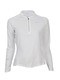

In [40]:
# Preview the target image

sample = DataChain.from_dataset("fashion-embeddings").filter(C("file.name") == TARGET_NAME).save()
img = next(sample.collect("file")).read()
img

## Calculate similarity

- Calculate the cosine and Euclidean distances between the embeddings of each image and the target image's embeddings using built-in `cosine_distance` and `euclidean_distance` functions.

In [44]:
dc = (
    DataChain(name="fashion-embeddings")
    .mutate(
        cos_dist=cosine_distance(C("embeddings"), TARGET_EMB),
        eucl_dist=euclidean_distance(C("embeddings"), TARGET_EMB),
    )
    .save("fashion-similarity")
)
dc.select("file.name", "cos_dist", "eucl_dist").show(3)

,file,cos_dist,eucl_dist
,name,,
0,10003.jpg,0.000000,0.000000
1,10007.jpg,0.202386,55.254814
2,10008.jpg,0.144793,46.445328



[Limited by 3 rows]


Here's a breakdown of the code:
- Load the `fashion-embeddings` dataset.
- Filter out the target image.
- Calculate the cosine and Euclidean distances between the embeddings of each image and the target image's embeddings using `cosine_distance` and `euclidean_distance` functions.
- Exclude the `embeddings` column from the output.
- Save the resulting dataset as `fashion-similarity`.

## Visualise Similarity distances 

In [45]:
# Preview results

dist = DataChain.from_dataset("fashion-similarity").order_by("cos_dist").to_pandas()
dist.head(10)

file                                                   \
                source                         parent       name   size   
0  gs://datachain-demo  fashion-product-images/images  10003.jpg  11564   
1  gs://datachain-demo  fashion-product-images/images  39405.jpg  13252   
2  gs://datachain-demo  fashion-product-images/images  12807.jpg  19756   
3  gs://datachain-demo  fashion-product-images/images   2286.jpg   1913   
4  gs://datachain-demo  fashion-product-images/images   2312.jpg   1593   
5  gs://datachain-demo  fashion-product-images/images  32640.jpg   1923   
6  gs://datachain-demo  fashion-product-images/images   9975.jpg   2417   
7  gs://datachain-demo  fashion-product-images/images  17912.jpg   1766   
8  gs://datachain-demo  fashion-product-images/images   9546.jpg   1885   
9  gs://datachain-demo  fashion-product-images/images  22581.jpg   1337   

                                                                           \
            version              etag is_latest             last_modified   
0  1719489683599343  CO/fpJ7e+4YDEAE=         1 1970-01-01 00:00:00+00:00   
1  1719489421555723  CIvwqqHd+4YDEAE=         1 1970-01-01 00:00:00+00:00   
2  1719489533577152  CMCP4Nbd+4YDEAE=         1 1970-01-01 00:00:00+00:00   
3  1719489826635823  CK+Av+Le+4YDEAE=         1 1970-01-01 00:00:00+00:00   
4  1719489488288919  CJf5k8Hd+4YDEAE=         1 1970-01-01 00:00:00+00:00   
5  1719489557020743  CMeA9+Hd+4YDEAE=         1 1970-01-01 00:00:00+00:00   
6  1719489549596567  CJfvsd7d+4YDEAE=         1 1970-01-01 00:00:00+00:00   
7  1719489862618502  CIab0/Pe+4YDEAE=         1 1970-01-01 00:00:00+00:00   
8  1719489497608583  CIfjzMXd+4YDEAE=         1 1970-01-01 00:00:00+00:00   
9  1719489393337685  CNXK8JPd+4YDEAE=         1 1970-01-01 00:00:00+00:00   

                  ... basecolour  season    year         usage  \
  location vtype  ...                                            
0     None        ...      White    Fall  2011.0        Sports   
1     None        ...   Lavender  Summer  2014.0  Smart Casual   
2     None        ...       Pink    Fall  2011.0        Sports   
3     None        ...      Black    Fall  2010.0        Sports   
4     None        ...      White    Fall  2010.0        Sports   
5     None        ...      White  Summer  2012.0        Sports   
6     None        ...        Red    Fall  2011.0        Sports   
7     None        ...      Cream    Fall  2011.0        Casual   
8     None        ...     Purple    Fall  2011.0        Sports   
9     None        ...     Purple    Fall  2011.0        Sports   

                                  productdisplayname   filename split  \
                                                                        
0             Nike Women As Nike Eleme White T-Shirt  10003.jpg  test   
1  U.S. Polo Assn. Men Lavender & White Striped L...  39405.jpg  test   
2                       Nike Women Hood Pink Jackets  12807.jpg  test   
3                          Nike Men Black Sweatshirt   2286.jpg  test   
4                       Nike Mens White Polo T-shirt   2312.jpg  test   
5             Nike Men Striped White & Black T-shirt  32640.jpg  test   
6                          Nike Men Red Polo Tshirts   9975.jpg  test   
7                     Nike Women Casual Cream Jacket  17912.jpg  test   
8  Nike Men As Elite Ultimate Ss Training Purple ...   9546.jpg  test   
9                 Nike Women Solid Purple Sweatshirt  22581.jpg  test   

                                          embeddings  cos_dist  eucl_dist  
                                                                           
0  [0.2275896966457367, -1.6725879907608032, -1.4...  0.000000   0.000000  
1  [1.4969186782836914, -0.7687392830848694, -1.8...  0.085597  35.853778  
2  [-0.6380502581596375, 0.09872499108314514, -3....  0.089258  36.802826  
3  [1.9576829671859741, -1.0292314291000366, -2.1...  0.094774  38.932333  
4  [1.0115976333618164, -0.39493992924690247, -1....  0.099031  37

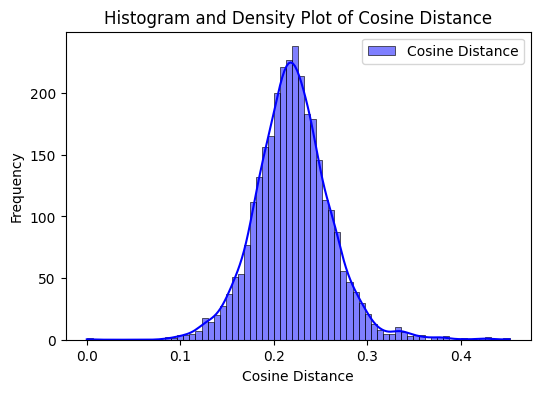

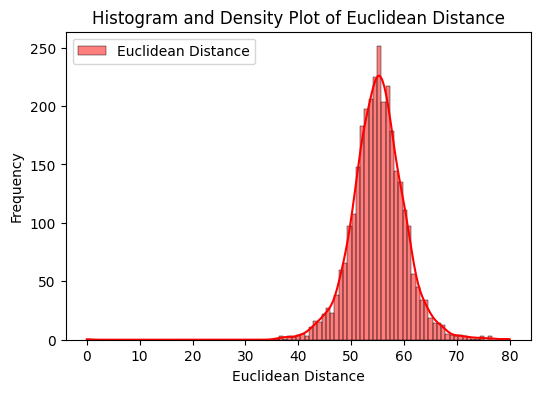

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram and Density Plot for Cosine Distance
plt.figure(figsize=(6, 4))
sns.histplot(dist["cos_dist"], color="blue", label="Cosine Distance", kde=True)
plt.title("Histogram and Density Plot of Cosine Distance")
plt.xlabel("Cosine Distance")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Histogram and Density Plot for Euclidean Distance
plt.figure(figsize=(6, 4))
sns.histplot(dist["eucl_dist"], color="red", label="Euclidean Distance", kde=True)
plt.title("Histogram and Density Plot of Euclidean Distance")
plt.xlabel("Euclidean Distance")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Visualize the most and the least similar images 

In [49]:
sim_ds = DataChain.from_dataset("fashion-similarity").order_by("cos_dist")
sim = sim_ds.to_pandas()
sim.head(10)

file                                                   \
                source                         parent       name   size   
0  gs://datachain-demo  fashion-product-images/images  10003.jpg  11564   
1  gs://datachain-demo  fashion-product-images/images  39405.jpg  13252   
2  gs://datachain-demo  fashion-product-images/images  12807.jpg  19756   
3  gs://datachain-demo  fashion-product-images/images   2286.jpg   1913   
4  gs://datachain-demo  fashion-product-images/images   2312.jpg   1593   
5  gs://datachain-demo  fashion-product-images/images  32640.jpg   1923   
6  gs://datachain-demo  fashion-product-images/images   9975.jpg   2417   
7  gs://datachain-demo  fashion-product-images/images  17912.jpg   1766   
8  gs://datachain-demo  fashion-product-images/images   9546.jpg   1885   
9  gs://datachain-demo  fashion-product-images/images  22581.jpg   1337   

                                                                           \
            version              etag is_latest             last_modified   
0  1719489683599343  CO/fpJ7e+4YDEAE=         1 1970-01-01 00:00:00+00:00   
1  1719489421555723  CIvwqqHd+4YDEAE=         1 1970-01-01 00:00:00+00:00   
2  1719489533577152  CMCP4Nbd+4YDEAE=         1 1970-01-01 00:00:00+00:00   
3  1719489826635823  CK+Av+Le+4YDEAE=         1 1970-01-01 00:00:00+00:00   
4  1719489488288919  CJf5k8Hd+4YDEAE=         1 1970-01-01 00:00:00+00:00   
5  1719489557020743  CMeA9+Hd+4YDEAE=         1 1970-01-01 00:00:00+00:00   
6  1719489549596567  CJfvsd7d+4YDEAE=         1 1970-01-01 00:00:00+00:00   
7  1719489862618502  CIab0/Pe+4YDEAE=         1 1970-01-01 00:00:00+00:00   
8  1719489497608583  CIfjzMXd+4YDEAE=         1 1970-01-01 00:00:00+00:00   
9  1719489393337685  CNXK8JPd+4YDEAE=         1 1970-01-01 00:00:00+00:00   

                  ... basecolour  season    year         usage  \
  location vtype  ...                                            
0     None        ...      White    Fall  2011.0        Sports   
1     None        ...   Lavender  Summer  2014.0  Smart Casual   
2     None        ...       Pink    Fall  2011.0        Sports   
3     None        ...      Black    Fall  2010.0        Sports   
4     None        ...      White    Fall  2010.0        Sports   
5     None        ...      White  Summer  2012.0        Sports   
6     None        ...        Red    Fall  2011.0        Sports   
7     None        ...      Cream    Fall  2011.0        Casual   
8     None        ...     Purple    Fall  2011.0        Sports   
9     None        ...     Purple    Fall  2011.0        Sports   

                                  productdisplayname   filename split  \
                                                                        
0             Nike Women As Nike Eleme White T-Shirt  10003.jpg  test   
1  U.S. Polo Assn. Men Lavender & White Striped L...  39405.jpg  test   
2                       Nike Women Hood Pink Jackets  12807.jpg  test   
3                          Nike Men Black Sweatshirt   2286.jpg  test   
4                       Nike Mens White Polo T-shirt   2312.jpg  test   
5             Nike Men Striped White & Black T-shirt  32640.jpg  test   
6                          Nike Men Red Polo Tshirts   9975.jpg  test   
7                     Nike Women Casual Cream Jacket  17912.jpg  test   
8  Nike Men As Elite Ultimate Ss Training Purple ...   9546.jpg  test   
9                 Nike Women Solid Purple Sweatshirt  22581.jpg  test   

                                          embeddings  cos_dist  eucl_dist  
                                                                           
0  [0.2275896966457367, -1.6725879907608032, -1.4...  0.000000   0.000000  
1  [1.4969186782836914, -0.7687392830848694, -1.8...  0.085597  35.853778  
2  [-0.6380502581596375, 0.09872499108314514, -3....  0.089258  36.802826  
3  [1.9576829671859741, -1.0292314291000366, -2.1...  0.094774  38.932333  
4  [1.0115976333618164, -0.39493992924690247, -1....  0.099031  37

10003.jpg


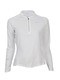

39405.jpg


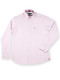

36723.jpg


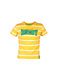

In [50]:
# Select images to display: target image, the most similar and the least similar 
img_names = [
    TARGET_NAME,
    sim.file.name[1], # Most Similar
    sim.file.name.iloc[-1] # Least Similar
]

# Save images in local temporary files
images = []
for name in img_names:
    print(name)
    try:
        sample = sim_ds.filter(C("file.name") == name).save()
        img = next(sample.collect("file")).read()
        images.append({name: img})
        display(img)
    except:  # noqa: E722
        print("Stop: ", name)


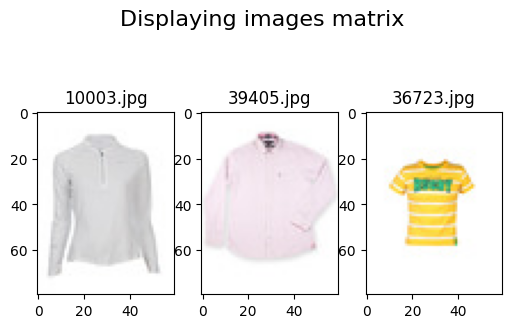

In [54]:
# Create subplots

f, ax_arr = plt.subplots(1, len(img_names), figsize=(6, 4))
title = "Displaying images matrix"
f.suptitle(title, fontsize=16)

# Plot images
for i, ax in enumerate(ax_arr):
    name = next(iter(images[i].keys()))
    img = images[i][name]
    ax.imshow(img) # Read & show image from a temporary file
    ax.set_title(name)
plt.show()


# 🧹 Finding and Removing Redundant Images

In this tutorial, you'll learn how to use DataChain to minimize redundant images in a dataset by selecting a diverse subset of images. 

- This is particularly useful when working with multiple product images captured from different angles
- It helps speed up computations and cut the costs 

Following these steps, you can effectively minimize redundant images in your dataset by selecting a diverse subset of images using DataChain and the `select_diverse_elements()` function.

**Note:**
- Make sure to implement (or import) the `select_diverse_elements()` function in the `src.clustering` module for this code to work.

In [ ]:
%pip install umap-learn

In [56]:
import matplotlib.pyplot as plt
import os
import random

from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from PIL import Image
from umap import UMAP
from src.clustering import select_diverse_elements

## Select groups to remove redundant images 

In [57]:
# Select GROUPS to remove redundant images

dc_source = DataChain.from_dataset("fashion-embeddings")
dc_source.show(3)

,file,file,file,file,file,file,file,file,file,file,gender,mastercategory,subcategory,articletype,basecolour,season,year,usage,productdisplayname,filename,split,embeddings
,source,parent,name,size,version,etag,is_latest,last_modified,location,vtype,,,,,,,,,,,,
0,gs://datachain-demo,fashion-product-images/images,10003.jpg,11564,1719489683599343,CO/fpJ7e+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Women,Apparel,Topwear,Tshirts,White,Fall,2011.0,Sports,Nike Women As Nike Eleme White T-Shirt,10003.jpg,test,"[0.2275896966457367, -1.6725879907608032, -1.4..."
1,gs://datachain-demo,fashion-product-images/images,10007.jpg,18895,1719489701142466,CMK/06be+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Women,Apparel,Topwear,Tshirts,White,Fall,2011.0,Sports,Nike Women As Trophy Swo White T-Shirts,10007.jpg,test,"[-0.8275866508483887, 0.21667443215847015, -2...."
2,gs://datachain-demo,fashion-product-images/images,10008.jpg,1881,1719489501603681,COHOwMfd+4YDEAE=,1,1970-01-01 00:00:00+00:00,None,,Men,Apparel,Topwear,Tshirts,Navy Blue,Fall,2011.0,Sports,Nike Men Town Navy Blue T-Shirts,10008.jpg,test,"[1.698774814605713, -0.006274789571762085, -1...."



[Limited by 3 rows]


In [58]:
# Select groups with large number of images (>100)

df = dc_source.to_pandas()
grouped = df.groupby("articletype").filter(lambda x: len(x) > 100)
grouped.articletype.value_counts()

articletype
Tshirts    1405
Shirts      652
Tops        341
Kurtas      341
Name: count, dtype: int64

In [59]:
# Get the list of  groups to remove redundant images

GROUPS = grouped["articletype"].unique().tolist()
GROUPS

['Tshirts', 'Shirts', 'Tops', 'Kurtas']

## Set the parameters for selecting diverse images

In [60]:
num_clusters = 6                 # Expected number of clusters
top_d = 30                       # Number of images from each cluster
tot_num = num_clusters * top_d   # Expected max number for diverse images

## Select `top_d` diverse images for each value in `UPC`

In [61]:
# Select top_d diverse images for each DUP group

diverse_ids = []                # IDs in DataChain dataset

for IMAGE_GROUP in GROUPS:
    print(IMAGE_GROUP)

    # Load Dataset
    ds_dup = (
        dc_source
        .filter(C("articleType") == IMAGE_GROUP)
    )

    # Get embeddings
    emb_all = ds_dup.select("embeddings").results() # -> list(tuple)

    # Select diverse images
    diverse_elements_indices = select_diverse_elements(emb_all, num_clusters, top_d)
    diverse_ids.extend(diverse_elements_indices)
    print("Indices of the most diverse elements:", diverse_elements_indices)


Tshirts
Indices of the most diverse elements: [984, 415, 667, 62, 197, 484, 361, 364, 1293, 419, 315, 109, 498, 47, 1320, 916, 658, 481, 100, 111, 924, 142, 360, 1042, 435, 1081, 1100, 1080, 530, 546, 444, 487, 338, 749, 1020, 696, 335, 1224, 695, 55, 282, 1201, 1195, 1191, 279, 30, 763, 443, 1248, 1376, 1095, 1198, 383, 74, 1089, 554, 1225, 1084, 643, 551, 103, 753, 920, 1356, 1149, 915, 92, 605, 1070, 239, 402, 773, 1068, 1046, 759, 176, 887, 889, 914, 905, 902, 918, 822, 919, 777, 906, 910, 929, 678, 713, 519, 52, 1398, 227, 1327, 293, 129, 56, 319, 374, 1375, 158, 1123, 564, 557, 974, 1128, 341, 661, 149, 250, 40, 1038, 409, 1148, 1177, 342, 480, 343, 148, 388, 960, 818, 606, 393, 963, 175, 594, 845, 794, 717, 775, 908, 922, 1131, 448, 529, 821, 856, 441, 179, 716, 1300, 793, 91, 1027, 37, 1133, 816, 681, 629, 456, 1029, 1246, 987, 177, 1382, 589, 1154, 1299, 1401, 525, 953, 842, 834, 1134, 501, 391, 101, 836, 655, 1384, 838, 1303, 1383, 1243, 588, 390, 1240, 397]
Shirts
Indices of

## Create a new dataset with the selected diverse images

- The `fashion-embeddings` dataset is filtered to include only the selected diverse images
- The resulting dataset is saved as `fashion-curated`

In [62]:
# Select diverse items

(
    dc_source
    .filter(C("sys.id").in_(diverse_ids))
    .save("fashion-curated")
)

print(DataChain.from_dataset("fashion-embeddings").to_pandas().shape)
print(DataChain.from_dataset("fashion-curated").to_pandas().shape)

(3062, 22)
(486, 22)


## Visualize Clusters

This section demonstrates how to visualize image clusters using UMAP (Uniform Manifold Approximation and Projection) and matplotlib. 
Let's break it down:
- 🔍 UMAP reduces high-dimensional embeddings to 2D for visualization.
- 🎭 Random sampling (k_samples) ensures a diverse representation of images.
- 🖼️ Image thumbnails are added to each point in the scatter plot.
- 🎨 The plot uses a colorbar to differentiate clusters.

In [63]:
# Extract image paths and embeddings from the "fashion-curated" dataset

image_paths = []
image_embeddings = []

for row in (
    DataChain.from_dataset("fashion-curated")
    .select("file.source", "file.parent", "file.name", "embeddings")
    .collect()
):
    image_paths.append(os.path.join(row[0], row[1], row[2]))
    image_embeddings.append(row[3])


In [64]:
def reduce_dimensions_umap(features, n_neighbors=15, n_components=2, metric="euclidean"):
    # This function uses UMAP to reduce the high-dimensional embeddings to 2D for visualization
    reducer = UMAP(n_neighbors, n_components, metric)
    embedding = reducer.fit_transform(features)
    return embedding

def plot_embeddings(ds: DataChain, embeddings: list, image_paths: list, k_samples=30):
    # This function creates a scatter plot of the reduced embeddings and adds image thumbnails at each point.

    # Ensure n_display does not exceed the number of image paths
    k_samples = min(k_samples, len(image_paths))

    # Generate random indexes
    indexes = np.random.choice(len(image_paths), k_samples, replace=False)
    selected_images = [image_paths[i] for i in indexes]
    selected_embs = [embeddings[i] for i in indexes]
    filenames = [os.path.basename(img_path) for img_path in selected_images]

    # Extract (X,Y) values
    x_values = [emb[0] for emb in selected_embs]
    y_values = [emb[1] for emb in selected_embs]

    # Configure the plot
    plt.figure(figsize=(16, 8))
    plt.scatter(x_values, y_values, s=5)
    plt.gca().set_aspect("equal", "datalim")
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title("UMAP projection of the Image Dataset", fontsize=24)
    ax = plt.gca()

    # Add image thumbnails at the points  
    for i, name in enumerate(filenames):

        # Extract image from DataChain
        sample = ds.filter(C("file.name") == name).save()
        img = next(sample.collect("file")).read()

        # Attach thumbnail to the point
        img.thumbnail((50, 50), Image.Resampling.LANCZOS)  # Updated line here
        imagebox = OffsetImage(img, zoom=0.5)
        ab = AnnotationBbox(imagebox, (x_values[i], y_values[i]), frameon=False)
        ax.add_artist(ab)

    plt.show()



In [66]:
# Apply UMAP to reduce embeddings dimensions

umap_v = reduce_dimensions_umap(
    image_embeddings,
    n_neighbors=15,
    n_components=2,
    metric="euclidean",
)

umap_v[:3]

array([[ 7.4727964,  8.403643 ],
       [ 5.2676563,  9.966292 ],
       [ 5.2359266, 10.675146 ]], dtype=float32)

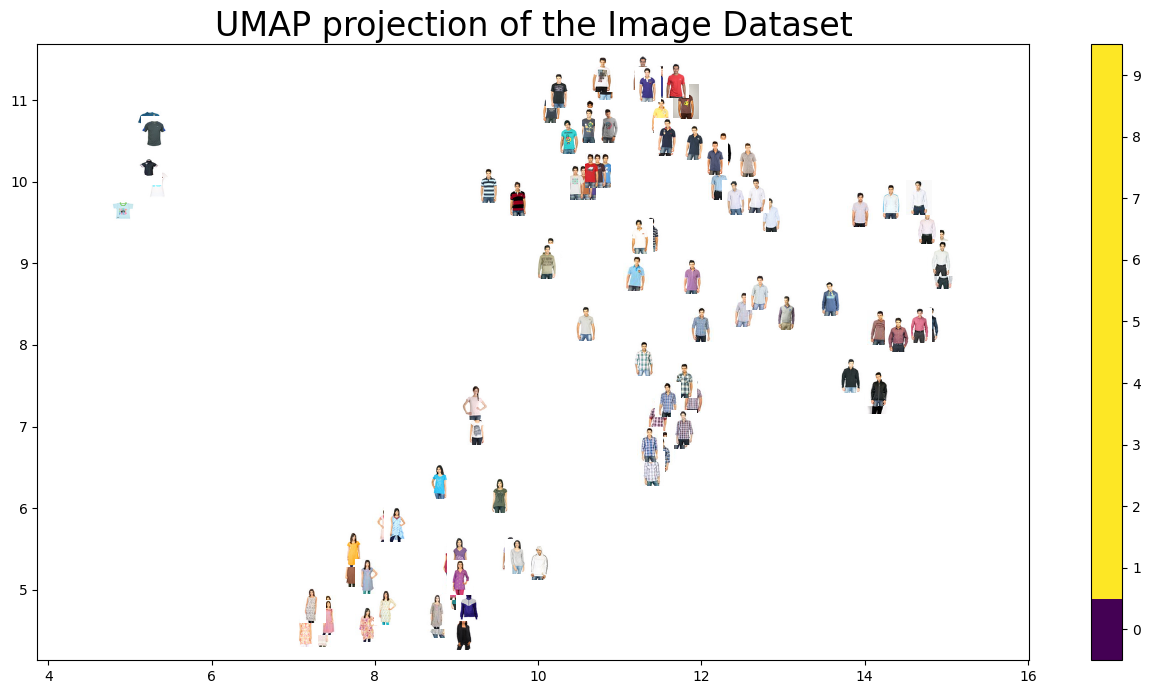

In [67]:
# Plot embeddings projection with image thumbnails

plot_embeddings(
    DataChain.from_dataset("fashion-curated"),
    umap_v,
    image_paths,
    k_samples=100)

# ☁️ Run in Studio (SaaS)

<a href="https://datachain.ai/">
    <img src="static/images/studio.png" alt="DataChain Studio SaaS" style="width: 600px;"/>
</a>

To run these examples in Studio, follow the guide

1. Open Studio / YOUR_TEAM / `datasets` workspace
2. Create a new Python Script
3. Copy/past a script from (split into few smaller scripts for convenience only)
   - `scripts/2-basic-operations.py`
   - `scripts/2-embeddings.py`
   - `scripts/2-similarity-search.py`
   - `scripts/2-remove-redundant-images.py`
5. Click the Run button


# 🎉 Summary 

**🌟 Congratulations! You've Mastered Advanced Image DataChain Techniques! 🌟**

In this tutorial, you've gained a wealth of knowledge and skills that will elevate your computer vision projects to new heights. Let's recap the key topics covered:

- 🔍 **Basic Operations:** Connecting to image catalogs, filtering, sorting, annotating, and versioning datasets.
- 🧩 **Splitting Datasets:** Dividing datasets into train, test, and validation subsets using the `train_test_split` UDF.
- 🎨 **Generating & Managing Embeddings:** Calculating and saving image embeddings for advanced analysis.
- 🔍 **Similarity Search:** Finding visually similar images and visualizing similarity distances.
- 🧹 **Minimizing Redundant Images:** Identifying and removing redundant images for dataset optimization.
- 🔍 **Visualizing Clusters:** Gaining insights into dataset structure through cluster visualization.

## What's Next?

Keep exploring, experimenting, and pushing the boundaries of what's possible in computer vision.  Check out the next parts of our tutorial series:
- 🧠 Training Models
- 🔮 Running Inference and Saving Predictions
- 📊 Analyzing Predictions

By mastering these techniques, you'll be well on your way to building powerful and efficient computer vision pipelines with DataChain.

## Get Involved

We'd love to have you join our growing community of DataChain users and contributors! Here's how you can get involved:
- ⭐ Give us a star on [GitHub](https://github.com/iterative/datachain) to show your support
- 🌐 Visit the [datachain.ai website](https://datachain.ai/) to learn more about our products and services
- 📞 Contact us to discuss how DataChain can help streamline your company's ML workflows
- 🙌 Follow us on social media for the latest updates and insights

Thanks for choosing DataChain, and happy coding! 😄